In [1]:
%matplotlib inline
import pandas as pd
import json
import os
from statsbombpy import sb
from mplsoccer import Pitch, Sbopen
import matplotlib.pyplot as plt

In [2]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [3]:
euros_2024_competition_id = 55
euros_2024_season_id = 282
matches = sb.matches(competition_id=euros_2024_competition_id, season_id=euros_2024_season_id)

In [4]:
spain_matches = matches[(matches['home_team'] == 'Spain') | (matches['away_team'] == 'Spain')]
for _, match in spain_matches.iterrows():
    match_id = match['match_id']
    lineups = sb.lineups(match_id=match_id)
    
    print(f"Match ID: {match_id}")

Match ID: 3943043
Match ID: 3942752
Match ID: 3942226
Match ID: 3941018
Match ID: 3930179
Match ID: 3930172
Match ID: 3930160


In [6]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3942752)
team1, team2 = df.team_name.unique()
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

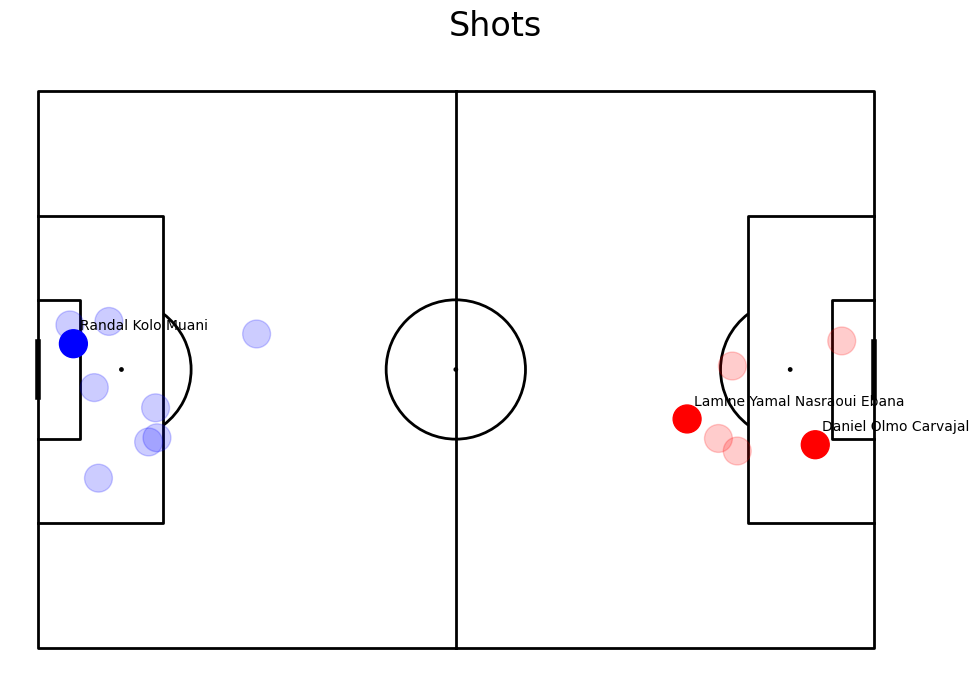

In [8]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
pitchLengthX = 120
pitchWidthY = 80
for i,shot in shots.iterrows():
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']    
    circleSize=2
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue") 
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
fig.suptitle("Shots", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()